# Can I Honestly Blame the Weather? In short, no.

There's not a strong correlation between the weather, days of the week, and my previous willingness to get active. Even when controlling for weather and precipitation I regularly slip below a good daily target. Time to get back at it!

In [48]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

In [435]:
df = pd.read_excel('walking_data.xlsx', sheet_name='Sheet2')
df = df.set_index('Date')
df.reset_index(inplace=True)
df.head()

,Date,Max Temp,Min Temp,Avg Temp,Precipitation,Mileage
0,2019-01-18,40,30,35.0,0.40,0.012160
1,2019-01-19,40,30,35.0,0.27,0.023948
2,2019-01-20,35,13,24.0,0.60,3.197614
3,2019-01-21,18,1,9.5,0.00,2.063436
4,2019-01-22,19,0,9.5,0.00,2.158470


In [436]:
def quality_calc(row):
    if row['Mileage'] > 5:
        return 'Excellent'
    if row['Mileage'] > 4 and row['Precipitation'] > 1:
        return 'Excellent'
    if row['Mileage'] > 4 and row['Max Temp'] > 80:
        return 'Excellent'
    if row['Mileage'] > 4 and row['Min Temp'] > 40:
        return 'Excellent'
    if row['Mileage'] > 3:
        return 'Tolerable'
    else:
        return 'Unacceptable'

df['Quality'] = df.apply(quality_calc, axis=1)
df['Weekday'] = df['Date'].dt.day_name()
df.head()

,Date,Max Temp,Min Temp,Avg Temp,Precipitation,Mileage,Quality,Weekday
0,2019-01-18,40,30,35.0,0.40,0.012160,Unacceptable,Friday
1,2019-01-19,40,30,35.0,0.27,0.023948,Unacceptable,Saturday
2,2019-01-20,35,13,24.0,0.60,3.197614,Tolerable,Sunday
3,2019-01-21,18,1,9.5,0.00,2.063436,Unacceptable,Monday
4,2019-01-22,19,0,9.5,0.00,2.158470,Unacceptable,Tuesday


Text(0.5, 1.0, 'Mileage vs. Max Temp')

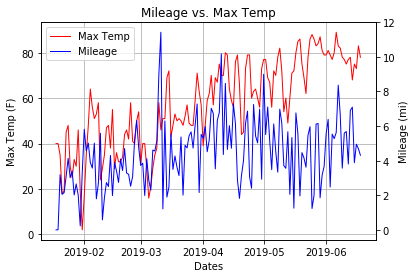

In [437]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

p1 = ax1.plot( 'Date', 'Max Temp', data=df, marker='', color='red', linewidth=1)
p2 = ax2.plot( 'Date', 'Mileage', data=df, marker='', color='blue', linewidth=1)

ax1.grid()
ax1.set_xlabel("Dates")
ax1.set_ylabel("Max Temp (F)")
ax2.set_ylabel("Mileage (mi)")

lns = p1+p2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.title('Mileage vs. Max Temp')

Text(0.5, 1.0, 'Mileage vs. Min Temp')

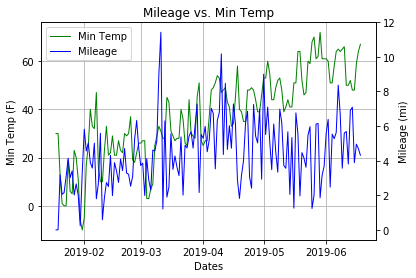

In [395]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

p1 = ax1.plot( 'Date', 'Min Temp', data=df, marker='', color='green', linewidth=1)
p2 = ax2.plot( 'Date', 'Mileage', data=df, marker='', color='blue', linewidth=1)

ax1.grid()
ax1.set_xlabel("Dates")
ax1.set_ylabel("Min Temp (F)")
ax2.set_ylabel("Mileage (mi)")

lns = p1+p2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.title('Mileage vs. Min Temp')

Text(0.5, 1.0, 'Mileage vs. Precipitation')

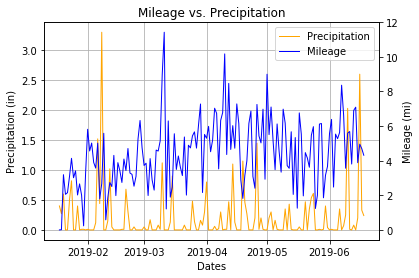

In [394]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

p1 = ax1.plot( 'Date', 'Precipitation', data=df, marker='', color='orange', linewidth=1)
p2 = ax2.plot( 'Date', 'Mileage', data=df, marker='', color='blue', linewidth=1)

ax1.grid()
ax1.set_xlabel("Dates")
ax1.set_ylabel("Precipitation (in)")
ax2.set_ylabel("Mileage (mi)")

lns = p1+p2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.title('Mileage vs. Precipitation')

In [333]:
dfz = df.drop('Weekday', axis=1).drop('Date', axis=1).drop('Quality', axis=1)

def cw(val):
    color = 'white' if val > 0 else 'black'
    return 'color: %s' % color
corr = dfz.corr()
corr.style.background_gradient(cmap='RdYlBu').set_precision(2).applymap(cw)

,Max Temp,Min Temp,Avg Temp,Precipitation,Mileage
Max Temp,1,0.92,0.98,0.077,0.32
Min Temp,0.92,1,0.98,0.063,0.28
Avg Temp,0.98,0.98,1,0.072,0.31
Precipitation,0.077,0.063,0.072,1,0.0095
Mileage,0.32,0.28,0.31,0.0095,1


Text(0.5, 1.0, 'Quality Counts by Weekday')

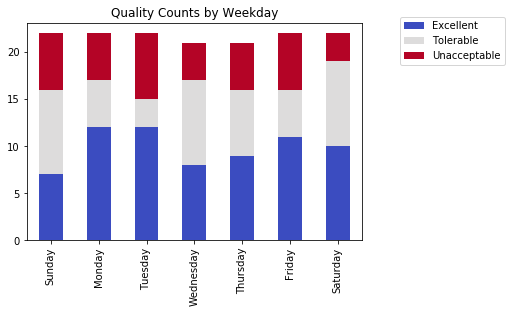

In [461]:
# Sort by weekday order
dfy = df
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
dfy['Day_ID'] = dfy['Weekday'].map(sorterIndex)
dfy.sort_values('Day_ID', inplace=True)


ind=np.arange(7)

dfx = pd.crosstab(index=dfy['Day_ID'], columns=dfy['Quality'])
dfx.plot(kind='bar', stacked=True, cmap='coolwarm').legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(ind,sorter)
plt.xlabel('')
plt.title('Quality Counts by Weekday')